#ELM-AE on MNIST Dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/data_resources/MNIST_TRAIN_TEST

/content/drive/MyDrive/data_resources/MNIST_TRAIN_TEST


In [5]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [6]:
train.shape

(60000, 785)

In [7]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train.values[:,1:])
y_train = onehotencoder.fit_transform(train.values[:,:1]).toarray()
X_test = scaler.fit_transform(test.values[:,1:])
y_test = onehotencoder.fit_transform(test.values[:,:1]).toarray()

In [9]:
y_train.shape

(60000, 10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
#The size of the input layer (no. of input features of the dataset)
input_size = X_train.shape[1]
print(input_size) #28*28

784


#Try initialize value for hidden_size

In [12]:
#The size of the input layer (no. of input features of the dataset)
input_size = X_train.shape[1]
print(input_size) #28*28

#Initialize the no. of hidden neurons
hidden_size = 1000

784


In [36]:
#Initialize the weights and bias randomly
input_weights = np.random.normal(size=[input_size,hidden_size]) #(784, 1000)
biases = np.random.normal(size=[hidden_size]) #(1000,)

In [64]:
#use a Rectified Linear Unit (ReLU) as hidden layer activation
def relu(x):
   return np.maximum(x, 0, x)  #Take an input array x, and for each element in x,if (x>0) keep the original value; otherwise, it replaces the element with 0.

 Create a function in computing the output weights which is β.
 * H = βT
 * The goal is to minimize the least square error between the target (training labels) and the output (predicted labels) using the norm least-squares solution

In [65]:
#Create a function to compute for H vector - H(the hidden layer of our network)
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [58]:
hidden_nodes(X_train).shape

(60000, 1000)

In [61]:
hidden_nodes(X_train)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30135387,  0.        ,  7.26809621, ...,  0.        ,
         0.        , 10.79523385],
       [ 0.14769561,  0.        , 14.24084808, ...,  6.23747924,
         5.31773165,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.40794932,  0.        ,  4.20360608, ...,  6.87917334,
         0.        ,  3.68087329],
       [ 0.        ,  0.        , 16.37860887, ...,  0.75933117,
         4.33243625,  0.        ]])

In [63]:
hidden_nodes(X_train)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30135387,  0.        ,  7.26809621, ...,  0.        ,
         0.        , 10.79523385],
       [ 0.14769561,  0.        , 14.24084808, ...,  6.23747924,
         5.31773165,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.40794932,  0.        ,  4.20360608, ...,  6.87917334,
         0.        ,  3.68087329],
       [ 0.        ,  0.        , 16.37860887, ...,  0.75933117,
         4.33243625,  0.        ]])

In [50]:
y_train.shape

(60000, 10)

In [67]:
y_train.shape

(60000, 10)

In [66]:
np.linalg.pinv(hidden_nodes(X_train)).shape

(1000, 60000)

In [68]:
#Compute β and assign the output matrix to output_weights
output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train)), y_train) #(1000, 60000)*(60000, 10)= (1000,10)

In [69]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [81]:
prediction = predict(X_test) #X_test=(10000, 784)
prediction.shape

(10000, 10)

In [76]:
prediction[0]

array([-0.02228571,  0.02268791,  0.10565356,  0.02721865,  0.00662835,
        0.01770832, -0.02229057,  0.95091703, -0.04397628, -0.05523832])

In [77]:
np.argmax(prediction[0])

7

In [78]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [79]:
np.argmax(y_test[0])

7

In [82]:
correct = 0
total = X_test.shape[0] #10000
for i in range(total):
    predicted = np.argmax(prediction[i])
    actual = np.argmax(y_test[i])
    correct += 1 if predicted == actual else 0
accuracy = correct/total
print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

Accuracy for  1000  hidden nodes:  0.9438


#Try different values for hidden_size

In [ ]:
import numpy as np

def relu(x):
    return np.maximum(x, 0)

def hidden_nodes(X, input_weights, biases):
    G = np.dot(X, input_weights) + biases
    H = relu(G)
    return H

def predict(X, input_weights, biases, output_weights):
    out = hidden_nodes(X, input_weights, biases)
    out = np.dot(out, output_weights)
    return out


In [14]:
input_size = X_train.shape[1]

hidden_sizes = range(1000, 3001, 1000)
accuracies = []

for hidden_size in hidden_sizes:
    print(f'Training with {hidden_size} hidden nodes')

    # Initialize the weights and biases randomly
    input_weights = np.random.normal(size=[input_size, hidden_size])
    biases = np.random.normal(size=[hidden_size])

    # Compute output weights
    output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train, input_weights, biases)), y_train)

    # Make predictions on test set
    prediction = predict(X_test, input_weights, biases, output_weights)

    # Calculate accuracy
    correct = 0
    total = X_test.shape[0]
    for i in range(total):
        predicted = np.argmax(prediction[i])
        actual = np.argmax(y_test[i])
        correct += 1 if predicted == actual else 0
    accuracy = correct / total
    accuracies.append(accuracy)
    print(f'Accuracy for {hidden_size} hidden nodes: {accuracy}\n')


Training with 1000 hidden nodes
Accuracy for 1000 hidden nodes: 0.9445

Training with 2000 hidden nodes
Accuracy for 2000 hidden nodes: 0.9587

Training with 3000 hidden nodes
Accuracy for 3000 hidden nodes: 0.9667



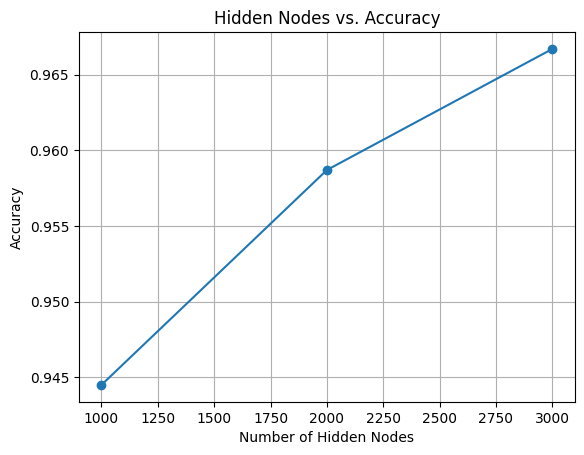

In [17]:
# Plotting the relationship between number of hidden nodes and accuracy
plt.plot(hidden_sizes, accuracies, marker='o')
plt.title('Hidden Nodes vs. Accuracy')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#Image reconstruction(Treat as Autoencoder where the input and output are the same with ELM)

In [18]:
def relu(x):
    return np.maximum(x, 0)

def hidden_nodes(X, input_weights, biases):
    G = np.dot(X, input_weights) + biases
    H = relu(G)
    return H

def predict(X, input_weights, biases, output_weights):
    out = hidden_nodes(X, input_weights, biases)
    out = np.dot(out, output_weights)
    return out


In [19]:
input_size = X_train.shape[1]
hidden_size = 1000

# Initialize the weights and biases randomly
input_weights = np.random.normal(size=[input_size, hidden_size]) #(784, 1000)
biases = np.random.normal(size=[hidden_size]) #(1000,)

In [24]:
hidden_nodes(X_train, input_weights, biases).shape

(60000, 1000)

In [25]:
X_train.shape

(60000, 784)

In [27]:
# Compute output weights for reconstruction.
# In autoencoder, output size is same as input size
output_weights = np.dot(np.linalg.pinv(hidden_nodes(X_train, input_weights, biases)), X_train)
print(output_weights.shape)

(1000, 784)


In [30]:
# Make predictions on input data
reconstructed_images = predict(X_train, input_weights, biases, output_weights)

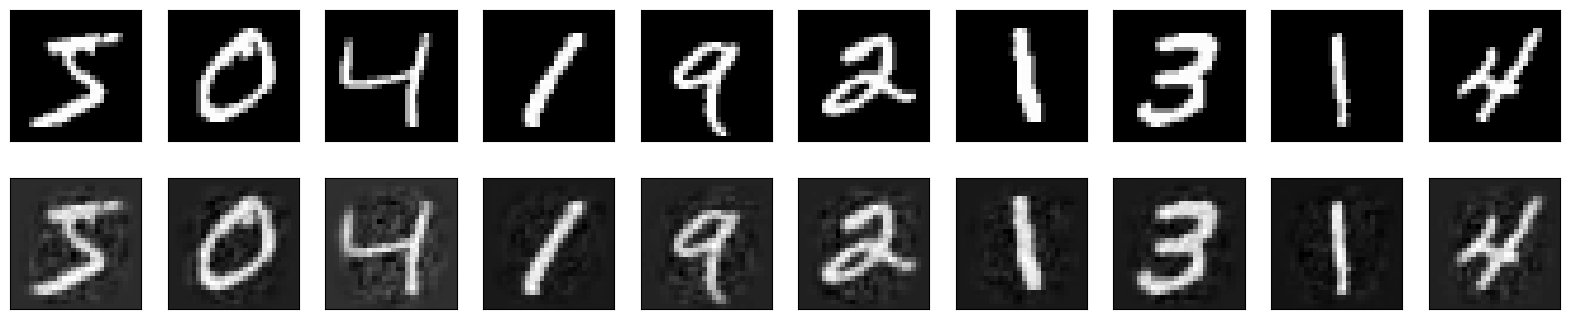

In [32]:
# Show original and reconstructed images
num_images = 10
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Display original images
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
